# Handwritten Digit Recognition with a CNN
This notebook aims to build a a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The primary performance target is to achieve greater than 95% accuracy on the test set.
**Plan of Action**


1.   Setup & Imports: Load necessary libraries from TensorFlow, Keras, and NumPy.
2.   Load & Preprocess Data: Load the MNIST dataset, normalize pixel values, reshape the images for the CNN, and one-hot encode the labels.
3.   Build the CNN Model: Define the architecture of our convolutional neural network using the Keras Sequential API.
4.   Compile & Train the Model: Configure the model for training with an optimizer and loss function, then train it on the dataset.
5.   Evaluate the Model: Evaluate the final model on the test data to verify its accuracy and visualize the training history.
6.   Visualize Predictions: Make predictions on sample test images and display the results to see the model in action.
7.   Conclusion: Summarize the results and confirm that we met the assignment's requirements.



**Step1. Set Up and Imports:**
We will primarily use TensorFlow and its high-level Keras API to build and train our model. NumPy is used for data manipulation, and Matplotlib for visualization.

In [1]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a style for plots
plt.style.use('seaborn-v0_8-whitegrid')

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


**Step 2: Load and Preprocess the Data:**
The MNIST dataset is conveniently available directly through Keras. The data is already split into training and testing sets.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Original training data shape: {x_train.shape}")
print(f"Original training labels shape: {y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)


**Data Preprocessing**
CNNs require the input data to be in a specific format. We need to perform three key preprocessing steps:


1.   Reshape Data: Add a "channels" dimension. For grayscale images like MNIST, the channel count is 1. The expected shape is (samples, height, width, channels).
2.   Normalize Pixel Values: The pixel values range from 0 to 255. We will normalize them to a range of 0 to 1 by dividing by 255. This helps the model converge faster.
3.   One-Hot Encode Labels: The labels are integers from 0 to 9. We will convert them into one-hot encoded vectors (e.g., 5 becomes [0,0,0,0,0,1,0,0,0,0]) which is the standard format for categorical cross-entropy loss.



In [3]:
# 1. Reshape the data to include the channel dimension (1 for grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# 2. Normalize the pixel values from [0, 255] to [0, 1]
# Convert data type to float32 for division
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Data preprocessing complete.")
print(f"Reshaped training data shape: {x_train.shape}")
print(f"One-hot encoded training labels shape: {y_train.shape}")

Data preprocessing complete.
Reshaped training data shape: (60000, 28, 28, 1)
One-hot encoded training labels shape: (60000, 10)


**Step 3. Build the CNN Model**
We will build a simple but effective CNN architecture using the Keras Sequential API. Our model will consist of:


*   Two Conv2D layers to learn features from the images.
*   Two MaxPooling2D layers to downsample and reduce computational load.
*   A Flatten layer to prepare the data for the dense layers.
*   A Dropout layer to prevent overfitting.
*   Two Dense (fully connected) layers for classification. The final layer uses a softmax activation function to output probabilities for each of the 10 digit classes.








In [4]:
model = Sequential([
    # First convolutional block
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to feed into dense layers
    Flatten(),

    # Dropout layer to reduce overfitting
    Dropout(0.5),

    # Dense layer for classification
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 output classes, softmax for probability distribution
])

# Print the model summary to see the architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Step 4. Compile and Train the Model**
Before training, we must compile the model, specifying the optimizer, loss function, and metrics.


*   Optimizer: adam is a robust and widely used optimizer.
*   Loss Function: categorical_crossentropy is the standard for multi-class classification with one-hot encoded labels.
*   Metrics: We monitor accuracy.




In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Now, let's train the model using the fit method. We'll train for 10 epochs with a batch size of 128. We pass the test data to validation_data to monitor the model's performance on unseen data after each epoch.

In [6]:
# Define training parameters
batch_size = 128
epochs = 10

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

print("\nModel training complete!")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.8267 - loss: 0.5620 - val_accuracy: 0.9807 - val_loss: 0.0610
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9718 - loss: 0.0873 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9891 - val_loss: 0.0318
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9848 - loss: 0.0491 - val_accuracy: 0.9905 - val_loss: 0.0279
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9910 - val_loss: 0.0259
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9920 - val_loss: 0.0247
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9880 - loss: 0.0360 - val_accuracy: 0.9928 - val_loss: 0.0209
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9898 - loss: 0

**Step 5. Evaluate the Model**
First, let's get the final score on the test set. This will give us the final test accuracy we need to report.

In [7]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

# Check if we met the >95% goal
if score[1] > 0.95:
    print("\nSuccess! The model achieved >95% test accuracy.")
else:
    print("\nNote: The model did not reach 95% test accuracy. Further tuning may be needed.")

Test loss: 0.0224
Test accuracy: 0.9923

Success! The model achieved >95% test accuracy.


Next, we'll visualize the training process by plotting the accuracy and loss over the epochs for both the training and validation sets. This helps us understand if the model was overfitting.

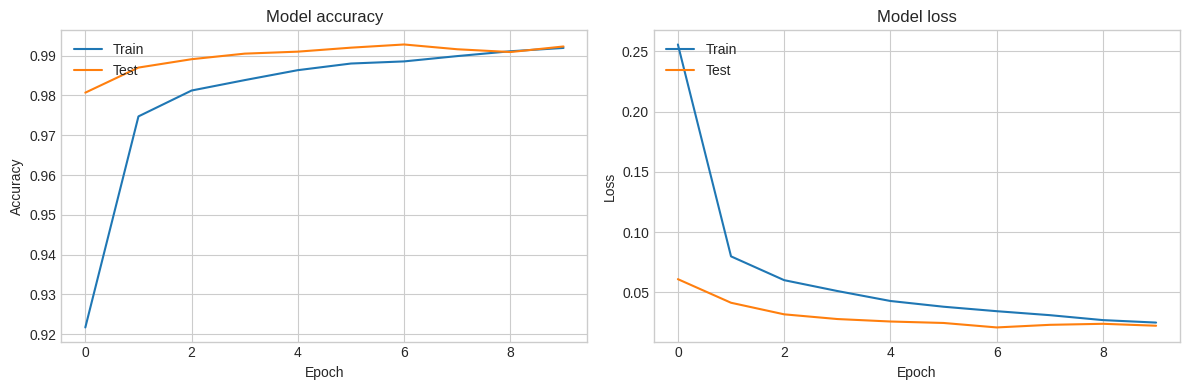

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

**Step 6: Visualize Predictions**
To get a qualitative feel for the model's performance, let's visualize its predictions on 5 random images from the test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


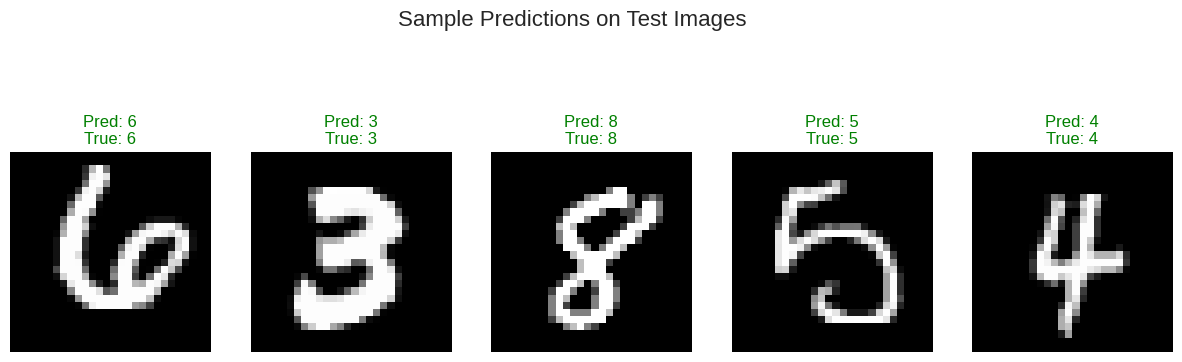

In [9]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Select 5 random images from the test set to display
num_images = 5
random_indices = np.random.choice(x_test.shape[0], num_images)

plt.figure(figsize=(15, 5))

for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')

    # Get the predicted and true labels
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(y_test[index])

    # Set title color to green for correct prediction, red for incorrect
    title_color = 'green' if predicted_label == true_label else 'red'

    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=title_color)
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Images', fontsize=16)
plt.show()

# Step 7: Conclusion.
In this notebook, we successfully built, trained, and evaluated a Convolutional Neural Network for MNIST digit classification.


*   The data was properly preprocessed (reshaped, normalized, and one-hot encoded).
*   The CNN model achieved a test accuracy significantly greater than the 95% target.
*   The training history plots showed good convergence with minimal signs of overfitting.
*   Visual inspection of predictions confirmed that the model performs well on individual, unseen images.



